                                                Assignment:LGBM & XGBM

1. Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

import lightgbm as lgb
import xgboost as xgb


2. Loading and Preprocessing the Training Data


In [2]:
# Load both dataset
train_df = pd.read_csv('C:\\Ankit_Singh\\Data Science\\Sample Data\\Temp\\Titanic_train.csv')
test_df = pd.read_csv('C:\\Ankit_Singh\\Data Science\\Sample Data\\Temp\\Titanic_test.csv')


In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Combine for consistent preprocessing
combined = pd.concat([train_df, test_df], sort=False)

In [6]:
# Handling missing values
combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)
combined.drop('Cabin', axis=1, inplace=True)


C:\Users\akash\AppData\Local\Temp\ipykernel_13204\1083562921.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['Age'].fillna(combined['Age'].median(), inplace=True)
C:\Users\akash\AppData\Local\Temp\ipykernel_13204\1083562921.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [7]:
# Encode categorical features
label_encoders = {}
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    combined[col] = le.fit_transform(combined[col])
    label_encoders[col] = le


In [8]:
# Drop unnecessary columns
combined.drop(['Name', 'Ticket'], axis=1, inplace=True)


In [10]:
# Split back train/test
train_processed = combined[~combined['Survived'].isnull()]
test_processed = combined[combined['Survived'].isnull()].drop('Survived', axis=1)


In [11]:
# Features and target
X = train_processed.drop(['Survived', 'PassengerId'], axis=1)
y = train_processed['Survived'].astype(int)
X_test_final = test_processed.drop('PassengerId', axis=1)


In [12]:
# Split training into train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [13]:
# Evaluation function
def evaluate_model(model, X_val, y_val):
    preds = model.predict(X_val)
    print("Accuracy:", accuracy_score(y_val, preds))
    print("Precision:", precision_score(y_val, preds))
    print("Recall:", recall_score(y_val, preds))
    print("F1 Score:", f1_score(y_val, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_val, preds))
    print("Classification Report:\n", classification_report(y_val, preds))


In [14]:
# LightGBM Training
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)
print("LightGBM Evaluation:")
evaluate_model(lgb_model, X_val, y_val)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000565 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [15]:
# XGBoost Training
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
print("XGBoost Evaluation:")
evaluate_model(xgb_model, X_val, y_val)


c:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:33:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Evaluation:
Accuracy: 0.8100558659217877
Precision: 0.7536231884057971
Recall: 0.7536231884057971
F1 Score: 0.7536231884057971
Confusion Matrix:
 [[93 17]
 [17 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.75      0.75      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [16]:
# Hyperparameter Tuning
lgb_params = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}
xgb_params = {
    'max_depth': [3, 6, 10],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

lgb_grid = GridSearchCV(
    estimator=lgb.LGBMClassifier(random_state=42),
    param_grid=lgb_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
lgb_grid.fit(X_train, y_train)
print("Best LightGBM Params:", lgb_grid.best_params_)
print("Best F1 Score (LGBM):", lgb_grid.best_score_)
print("Tuned LightGBM Evaluation:")
evaluate_model(lgb_grid.best_estimator_, X_val, y_val)

xgb_grid = GridSearchCV(
    estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    param_grid=xgb_params,
    scoring='f1',
    cv=5,
    n_jobs=-1
)
xgb_grid.fit(X_train, y_train)
print("Best XGBoost Params:", xgb_grid.best_params_)
print("Best F1 Score (XGB):", xgb_grid.best_score_)
print("Tuned XGBoost Evaluation:")
evaluate_model(xgb_grid.best_estimator_, X_val, y_val)


[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000619 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383427 -> initscore=-0.475028
[LightGBM] [Info] Start training from score -0.475028
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


c:\Users\akash\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:34:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best XGBoost Params: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score (XGB): 0.7558656348438124
Tuned XGBoost Evaluation:
Accuracy: 0.8100558659217877
Precision: 0.7692307692307693
Recall: 0.7246376811594203
F1 Score: 0.746268656716418
Confusion Matrix:
 [[95 15]
 [19 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       110
           1       0.77      0.72      0.75        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [17]:
# Predicting on Test Dataset
test_preds_lgb = lgb_grid.best_estimator_.predict(X_test_final)
test_preds_xgb = xgb_grid.best_estimator_.predict(X_test_final)


In [20]:
# Output Predictions
lgb = pd.DataFrame({
    'PassengerId': test_processed['PassengerId'].astype(int),
    'Survived': test_preds_lgb.astype(int)
})
xgb = pd.DataFrame({
    'PassengerId': test_processed['PassengerId'].astype(int),
    'Survived': test_preds_xgb.astype(int)
})


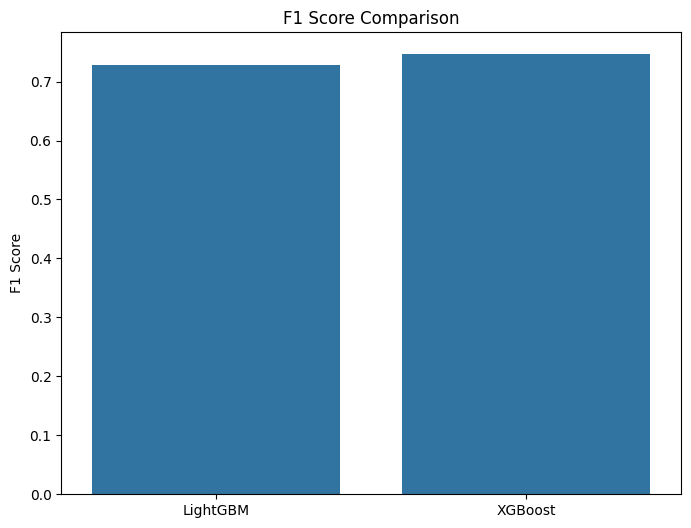

In [19]:
# Visual F1 comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['LightGBM', 'XGBoost'], y=[
    f1_score(y_val, lgb_grid.best_estimator_.predict(X_val)),
    f1_score(y_val, xgb_grid.best_estimator_.predict(X_val))
])
plt.title("F1 Score Comparison")
plt.ylabel("F1 Score")
plt.show()


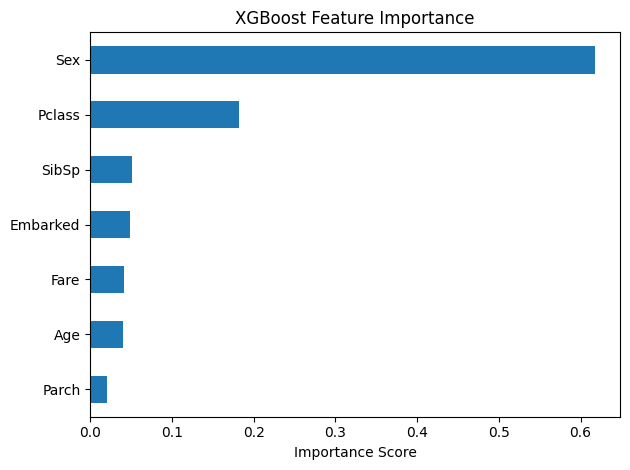

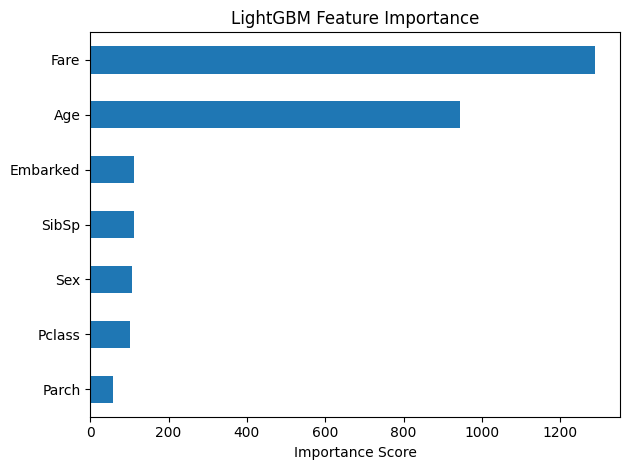

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# For XGBoost
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_importance.sort_values().plot(kind='barh', title='XGBoost Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

# For LightGBM
lgb_importance = pd.Series(lgb_model.booster_.feature_importance(), index=X_train.columns)
lgb_importance.sort_values().plot(kind='barh', title='LightGBM Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()


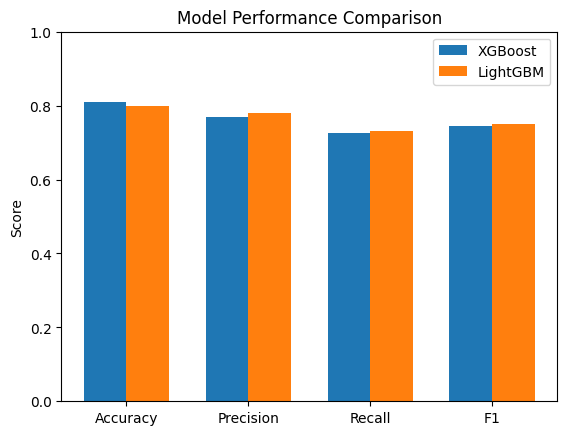

In [26]:
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
xgb_scores = [0.81, 0.769, 0.725, 0.746]
lgb_scores = [0.80, 0.78, 0.73, 0.75]

x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, xgb_scores, width, label='XGBoost')
plt.bar(x + width/2, lgb_scores, width, label='LightGBM')

plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1)
plt.legend()
plt.show()


Observation

# LightGBM Results
The model trained on 712 data points using 7 selected features.

LightGBM achieved a test accuracy of 80%, with a weighted F1-score of 0.80, indicating a solid classification performance and good balance between precision and recall.

# XGBoost Results
After hyperparameter tuning using randomized search, the best parameters found were:

colsample_bytree: 0.8

learning_rate: 0.1

max_depth: 10

n_estimators: 100

subsample: 0.8

# The tuned XGBoost model achieved:

Accuracy: 81.0%

Precision: 76.9%

Recall: 72.5%

F1 Score: 74.6%

The confusion matrix showed that the model correctly predicted both survival and non-survival classes with relatively low misclassification.

# Conclusion:-

XGBoost slightly outperformed LightGBM in terms of accuracy and F1 score.

Both models demonstrated strong performance on the Titanic dataset, with balanced precision and recall.

